In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,f1_score

Mounting the drive containing the creditcard data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Loading in the creditcard data and showing a part of the data.

In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard.csv")
df = df.sample(frac=1).reset_index()
df.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,123173,76837.0,-1.532738,1.381636,1.972383,-1.627542,0.028538,-0.842331,1.331494,-0.806416,1.551211,1.719406,0.690998,-0.116192,-0.249479,-1.207764,0.924742,-0.295828,-0.666949,-1.164733,-1.378053,0.889070,-0.359956,0.020908,-0.060045,0.619002,-0.345443,0.612304,0.011339,-0.410334,7.68,0
1,73724,55253.0,1.121078,0.136490,0.509031,1.327602,-0.247596,0.001118,-0.085944,0.158199,0.122637,0.067681,1.227501,0.919692,-0.942222,0.410316,-0.735500,-0.555418,0.126657,-0.467081,-0.148328,-0.245544,-0.048987,0.042201,-0.035045,0.212967,0.584923,-0.339197,0.033312,0.005036,1.00,0
2,260425,159553.0,2.117533,0.053973,-2.214881,0.264774,0.621560,-0.718683,0.080700,-0.150646,0.900686,-0.426039,-1.342511,-1.177086,-1.640454,-0.432154,1.193336,0.532707,0.202044,1.000115,-0.126291,-0.264557,0.120386,0.399485,-0.056427,-0.082016,0.311290,-0.085282,-0.020171,-0.035374,4.25,0
3,129666,79177.0,-1.390803,1.557338,0.407697,-0.045973,-0.495813,-0.334196,-0.238542,1.123191,-0.656985,-0.502267,1.273355,0.518889,-0.809870,0.548186,0.493847,0.563310,0.416315,0.085635,-0.192590,-0.063017,-0.144256,-0.591522,0.114823,-0.061521,-0.200639,0.096879,0.127706,-0.006881,17.99,0
4,225009,144060.0,2.209576,-0.460521,-2.066690,-0.575268,0.196431,-0.957810,0.233858,-0.442743,-1.199704,1.111817,0.333758,0.834983,0.808542,0.466630,-1.220029,-1.845125,-0.276824,1.106933,-0.137624,-0.560353,-0.234469,-0.015364,-0.030071,-0.426780,0.294727,0.836056,-0.097516,-0.094097,10.94,0


I  split up the data in two dataframes. One contains the frauds and the other non-frauds

In [5]:
frauds = df.query("Class == 1")
non_frauds = df.query("Class == 0")
print(len(frauds))
print(len(non_frauds))

492
284315


Plotting both frauds and non frauds as a histogram. Majority is non-frauds.

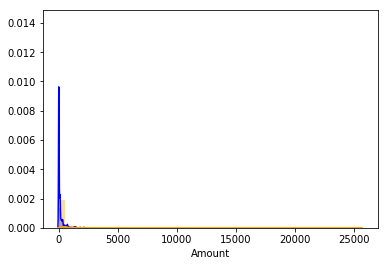

In [12]:
sns.distplot(frauds["Amount"], color="blue", label="fraud")
sns.distplot(non_frauds["Amount"], color="orange", label="non-fraud")


Now preparing x and y. Splitting into feature columns and label. The last column is used as label, and the rest as feature. I split the data into test an training data using train test split. Test is 40 % and training is 60 %. 

In [0]:
x = scale(np.array(df.iloc[:, :-1]))
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

Now I train the model I want to use for prediciting future frauds. I chose logistic regsion as my model, which I train on my training and test data

In [13]:
logistic = LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now that my model has been trained on my data I want to try predict future frauds with my test data. I print out the f score, which gives a measure on the test accuracty. A f1 score has the best value at 1 and worst at 0. Micro calculates globally by counting the total amount of true positives and false positives. 

In [9]:
y_pred = np.array(logistic.predict(X_test))
score = f1_score(y_pred=y_pred,y_true=y_test,average='micro')

score

0.9992451041492938

I use the classification report to conclude on my main classification metrics. I can see that precision for Non-fraud is 1.0, which means the model has predicted perfectly the positives that were positives. The non-frauds is a lower on 0.87 on precision. Reason might be overfitting, but then it might also have affected the non-frauds. Recall measures the share of predicted positives over the actual number of positives. Recall is a bit lower for the fraud. 

In [10]:
creport = classification_report(y_pred=y_pred,y_true=y_test,target_names=['Non-fraud','Fraud'])
print(creport)

              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00    113722
       Fraud       0.87      0.68      0.76       201

    accuracy                           1.00    113923
   macro avg       0.93      0.84      0.88    113923
weighted avg       1.00      1.00      1.00    113923

